In [1]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import plotly

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyze= SentimentIntensityAnalyzer()

In [3]:
from wordcloud import WordCloud, STOPWORDS
from plotly import tools

In [4]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

# Reading data and extracting basic information

In [5]:
file= open(r"C:\Users\megha\Desktop\tweepy\data_tweepy.txt", "r")
tweets_data = []
for line in file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
print ("Total tweets: ",len(tweets_data))

Total tweets:  1326


In [6]:
df= pd.DataFrame(tweets_data)
df.info()
df1= df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 36 columns):
contributors                 0 non-null object
coordinates                  1 non-null object
created_at                   1326 non-null object
display_text_range           253 non-null object
entities                     1326 non-null object
extended_entities            213 non-null object
extended_tweet               205 non-null object
favorite_count               1326 non-null int64
favorited                    1326 non-null bool
filter_level                 1326 non-null object
geo                          1 non-null object
id                           1326 non-null int64
id_str                       1326 non-null object
in_reply_to_screen_name      157 non-null object
in_reply_to_status_id        151 non-null float64
in_reply_to_status_id_str    151 non-null object
in_reply_to_user_id          157 non-null float64
in_reply_to_user_id_str      157 non-null object
is_quote_sta

In [7]:
df= df.filter(items= ['created_at', 'entities', 'favorite_count', 'lang', 'possibly_sensitive','quote_count', 'is_quote_status','retweet_count', 'user','text','timestamp_ms','truncated'])
df.head()

created_at  \
0  Thu May 16 02:26:11 +0000 2019   
1  Thu May 16 02:26:17 +0000 2019   
2  Thu May 16 02:26:17 +0000 2019   
3  Thu May 16 02:26:23 +0000 2019   
4  Thu May 16 02:26:24 +0000 2019   

                                            entities  favorite_count lang  \
0  {'hashtags': [], 'urls': [], 'user_mentions': ...               0   en   
1  {'hashtags': [], 'urls': [], 'user_mentions': ...               0   ja   
2  {'hashtags': [{'text': 'python', 'indices': [9...               0   en   
3  {'hashtags': [], 'urls': [], 'user_mentions': ...               0   en   
4  {'hashtags': [], 'urls': [], 'user_mentions': ...               0   en   

  possibly_sensitive  quote_count  is_quote_status  retweet_count  \
0                NaN            0            False              0   
1                NaN            0            False              0   
2              False            0            False              0   
3                NaN            0            False              0   
4              False            0            False              0   

                                                user  \
0  {'id': 886743250601746432, 'id_str': '88674325...   
1  {'id': 748519399, 'id_str': '748519399', 'name...   
2  {'id': 900671288687177728, 'id_str': '90067128...   
3  {'id': 310464097, 'id_str': '310464097', 'name...   
4  {'id': 805066112, 'id_str': '805066112', 'name...   

                                                text   timestamp_ms  truncated  
0  @DadFeels @sunreux What about the ruby playbut...  1557973571713      False  
1             今年の夏に備えてUPSを購入。\n...我が家のRubyさんから視線がが。。  1557973577155      False  
2  RT @ProgrammerBooks: Implementing Microsoft Dy...  1557973577947      False  
3  RT @eenriquelopez: This is a semicolon: ;\n\nT...  1557973583826      False  
4  RT @overtime: BUDDY FLEW 🤯 (via Jeremy Ruby/FB...  1557973584031      False

In [8]:
vals={}

for i in df['lang']:
    if i not in vals.keys():
        vals.setdefault(i,1)
    else:
        vals[i]+=1
newval={}
for i,j in vals.items():
    if j> 30:
       newval[i]= j        
x1= list(newval.keys())
y1= list(newval.values())
trace0= go.Bar(x=x1, y=y1,marker=dict(
        color=['rgba(220,50,100,1)','rgba(200,20,200,1)','rgba(210,210,210,1)','rgba(150,300,100,1)',
               'rgba(220,200,0,1)','rgba(240,180,60,1)','rgba(190,200,250,1)']))

data= [trace0]
layout={"title": "Top five languages in tweets","titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"Languages","titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Number of tweets","titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

#### Above graph gives insight into most frquently used languages in tweets. This makes it easy for us to search for tweets based on languages and analyse them separately. As it appears, English is the most commonly used followed by Japanese,Spanish and Indonesian.

In [9]:
vals2= {'True':0, 'False':0, "Neither":0}
for i in df['possibly_sensitive']:
    if i==False:
        vals2['False']+=1
    elif i==True:
        vals2['True']+=1
    else:
        vals2['Neither']+=1
x2= list(vals2.keys())
y2= list(vals2.values())
trace = go.Pie(labels=x2, values=y2)
data= [trace]
layout={"title": "Sensitive content","titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        )}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

#### Sentive content refers to content that people may find offensive,hateful or distrubing. Above graph provides ratio of tweets containing sensitive language to the ones that don't from the given set of tweets. Assuming most of the sensitve content is shared by people belonging to age group 18 and above, for a given query, this helps us analyze theaudience demographic based on age. Only 1.81% of tweets contain sensitive information.

In [10]:
time={'1000':0, '2000':0, '3000': 0, '4000':0, '5000':0, '6000':0, '7000':0, '8000':0, '9000':0, '10000':0}
for i in df['timestamp_ms']:
    if int(i[-4:]) in range(0,1000):
        time['1000']+=1
    elif int(i[-4:]) in range(1000,2000):
        time['2000']+=1
    elif int(i[-4:]) in range(2000,3000):
        time['3000']+=1
    elif int(i[-4:]) in range(3000,4000):
        time['4000']+=1
    elif int(i[-4:]) in range(4000,5000):
        time['5000']+=1
    elif int(i[-4:]) in range(5000,6000):
        time['6000']+=1
    elif int(i[-4:]) in range(6000,7000):
        time['7000']+=1
    elif int(i[-4:]) in range(7000,8000):
        time['8000']+=1   
    elif int(i[-4:]) in range(8000,9000):
        time['9000']+=1
    else :
        time['10000']+=1
x3= list(time.keys())
y3= list(time.values())
trace = go.Scatter( x = x3,y = y3)
data = [trace]
layout={"title": "Number of tweets per second","titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"Time","titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Number of tweets","titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

In [11]:
link=0
rt=0
urls=0
ment=0
hashtag=0

for i in df['text']:
    if 'RT' in str(i):
        rt+=1
    if 'https' in str(i):
        link+=1
    if '@' in str(i):
        ment+=1
    if '#' in str(i):
        hashtag+=1

        
graph={'Retweets':rt, 'Links':link, 'User mentions':ment, 'Hashtags':hashtag, 'Quoted statuses':len(df[df['is_quote_status']==True])}
x4= list(graph.keys())
y4= list(graph.values())
trace0= go.Bar(x=x4, y=y4,marker=dict(
        color=['rgba(50,100,200,1)', 'rgba(220,50,100,1)','rgba(200,20,200,1)','rgba(210,210,210,1)','rgba(150,300,100,1)',
               'rgba(220,220,20,1)', 'rgba(20,100,300,1)','rgba(230,230,230,1)','rgba(240,180,60,1)','rgba(190,200,250,1)']))
data= [trace0]
layout={"title": "Tweet entities","titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"Type","titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Frequency","titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

#### Retweets: Gives the number of tweets that are re-tweets of other tweets, from given data set. Greater number signifies that several people share the same opinion(positive or negative) about said query. 
#### Links: Gives the total number of tweets containing links or references to other sites/users which can be used for in depth analysis of what the user is trying to convey.
#### Hashtags: They are used to set/follow a certain trend. This bar represents the number of tweets containing hashtags. Analysing each of these hashtags can help us understand the wide range of topics/themes that each user associates the said query with.
#### Quoted statuses:
#### User mentions: 

In [12]:
android=0
iphone=0
other=0
for i in df1['source']:
    if 'android' in str(i):
        android+=1
    elif 'iphone' in str(i):
        iphone+=1
    else:
        other+=1

trace = go.Pie(labels=["Android users", "Iphone users", "Other"], values=[android, iphone, other])
data= [trace]
layout={"title": "Phone users","titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        )}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

#### Above graph helps us understand user demographics based on phone used. People using a certain type of phone may have a different kind of opinion about said query when compared to people using another type of phone.

# Sentiment Analysis
## Analysing tweets in English

In [13]:
for i,j in enumerate(df1['lang']):
    if str(j)!='en':
        df1.drop(i, inplace=True)
        
pos=[]
neg=[]
neut=[]
l=[]
sentiment={'pos':0, 'neg':0, 'neutral':0}
for i in df1['text']:
    j=dict(analyze.polarity_scores(i))
    if(float(j['compound'])>0):
        l.append(1)
        pos.append(i)
        sentiment['pos']+=1
    elif(float(j['compound'])==0):
        l.append(0)
        neut.append(i)
        sentiment['neutral']+=1
    else :
        l.append(-1)
        neg.append(i)
        sentiment['neg']+=1
df1['sent']= l

trace0= go.Bar(x=list(sentiment.keys()), y=list(sentiment.values()),marker=dict(color=['rgba(100,270,100,1)', 'rgba(255,0,50,1)', 'rgba(150,200,250,1)']))
data= [trace0]
layout={"title": "Polarity of tweets","titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"Sentiment","titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Number of tweets","titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

#### Here we have only extracted tweets in English, since this is our main focus. Above graph gives general sentiment of all the English tweets of said query. As is evident, most people have a more neutral opinion on 'Python, Java and Ruby'. Only about 11% of tweets convey a negative opinion.

### Sentiment based on type of device used

In [14]:
android=[]
iphone=[]
other=[]
for i in df1.index:
    if 'android' in str(df1['source'][i]):
        android.append(df1['text'][i])
    elif 'iphone' in str(df1['source'][i]):
        iphone.append(df1['text'][i])
    else:
        other.append(df1['text'][i])

In [15]:
sentiment={'pos':0, 'neg':0, 'neutral':0}
for i in android:
    j=dict(analyze.polarity_scores(i))
    if(float(j['compound'])>0):
        sentiment['pos']+=1
    elif(float(j['compound'])==0):
        sentiment['neutral']+=1
    else :
        sentiment['neg']+=1
trace14= go.Bar(x=list(sentiment.keys()), y=list(sentiment.values()), marker=dict(color=['rgba(100,270,100,1)', 'rgba(255,0,50,1)', 'rgba(150,200,250,1)']), name="2:20-2:40")

In [16]:
sentiment={'pos':0, 'neg':0, 'neutral':0}
for i in iphone:
    j=dict(analyze.polarity_scores(i))
    if(float(j['compound'])>0):
        sentiment['pos']+=1
    elif(float(j['compound'])==0):
        sentiment['neutral']+=1
    else :
        sentiment['neg']+=1
trace15= go.Bar(x=list(sentiment.keys()), y=list(sentiment.values()), marker=dict(color=['rgba(100,270,100,1)', 'rgba(255,0,50,1)', 'rgba(150,200,250,1)']), name="2:20-2:40")

In [17]:
sentiment={'pos':0, 'neg':0, 'neutral':0}
for i in other:
    j=dict(analyze.polarity_scores(i))
    if(float(j['compound'])>0):
        sentiment['pos']+=1
    elif(float(j['compound'])==0):
        sentiment['neutral']+=1
    else :
        sentiment['neg']+=1
trace16= go.Bar(x=list(sentiment.keys()), y=list(sentiment.values()), marker=dict(color=['rgba(100,270,100,1)', 'rgba(255,0,50,1)', 'rgba(150,200,250,1)']), name="2:20-2:40")

In [18]:
figb=tools.make_subplots(rows=1, cols=3,subplot_titles=("Android", "IPhone", "Other"), shared_yaxes=True)
figb.append_trace(trace14,1,1)
figb.append_trace(trace15,1,2)
figb.append_trace(trace16,1,3)
figb.layout.update(title="Polarity of tweets based on type of user device",titlefont=dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ),xaxis=dict(
        title='Words',
        titlefont=dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )), yaxis=dict(
        title='Frequency',
        titlefont=dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )), showlegend= False)
iplot(figb)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]  [ (1,3) x3,y1 ]



In [20]:
sensitive= {'True':[], 'False':[], "Neither":[]}
for i in df.index:
    j=df['possibly_sensitive'][i]
    if j==False:
        sensitive['False'].append(df['text'][i])
    elif j==True:
        sensitive['True'].append(df['text'][i])
    else:
        sensitive['Neither'].append(df['text'][i])

In [22]:
sentiment={'pos':0, 'neg':0, 'neutral':0}
for i in sensitive['True']:
    j=dict(analyze.polarity_scores(i))
    if(float(j['compound'])>0):
        sentiment['pos']+=1
    elif(float(j['compound'])==0):
        sentiment['neutral']+=1
    else :
        sentiment['neg']+=1
trace17= go.Bar(x=list(sentiment.keys()), y=list(sentiment.values()), marker=dict(color=['rgba(100,270,100,1)', 'rgba(255,0,50,1)', 'rgba(150,200,250,1)']), name="2:20-2:40")

In [23]:
sentiment={'pos':0, 'neg':0, 'neutral':0}
for i in sensitive['False']:
    j=dict(analyze.polarity_scores(i))
    if(float(j['compound'])>0):
        sentiment['pos']+=1
    elif(float(j['compound'])==0):
        sentiment['neutral']+=1
    else :
        sentiment['neg']+=1
trace18= go.Bar(x=list(sentiment.keys()), y=list(sentiment.values()), marker=dict(color=['rgba(100,270,100,1)', 'rgba(255,0,50,1)', 'rgba(150,200,250,1)']), name="2:20-2:40")

In [24]:
sentiment={'pos':0, 'neg':0, 'neutral':0}
for i in sensitive['Neither']:
    j=dict(analyze.polarity_scores(i))
    if(float(j['compound'])>0):
        sentiment['pos']+=1
    elif(float(j['compound'])==0):
        sentiment['neutral']+=1
    else :
        sentiment['neg']+=1
trace19= go.Bar(x=list(sentiment.keys()), y=list(sentiment.values()), marker=dict(color=['rgba(100,270,100,1)', 'rgba(255,0,50,1)', 'rgba(150,200,250,1)']), name="2:20-2:40")

In [26]:
figc=tools.make_subplots(rows=1, cols=3,subplot_titles=("True", "False", "Neither"), shared_yaxes=True)
figc.append_trace(trace17,1,1)
figc.append_trace(trace18,1,2)
figc.append_trace(trace19,1,3)
figc.layout.update(title="Polarity of tweets based on sensitice content",titlefont=dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ),xaxis=dict(
        title='Words',
        titlefont=dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )), yaxis=dict(
        title='Frequency',
        titlefont=dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )), showlegend= False)
iplot(figc)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]  [ (1,3) x3,y1 ]



# Word Clouds
### Cleaning all tweets in english and forming word clouds for all, positive, negative and neutral tweets respectively

In [27]:
texts=[]
for i in df1['text']:
    texts.append(str(i))

In [28]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear")

In [29]:
def clean_tweets(tweets):
    for i in range(len(tweets)):
        tweets[i]=re.sub(r'RT @[A-Za-z0-9_:]+','',tweets[i])
        tweets[i]=re.sub(r'@[A-Za-z0-9_:]+','',tweets[i]) 
        tweets[i]=re.sub('https?://[A-Za-z0-9./]+','',tweets[i])
        tweets[i]= re.sub(r'#[A-Za-z0-9]+','',tweets[i])
        tweets[i]= re.sub("[^a-zA-Z]", " ", tweets[i])
    for i in range(len(tweets)):
        tweets[i]=re.sub(' +', ' ',tweets[i])
        tweets[i]= tweets[i].strip() 
    return tweets

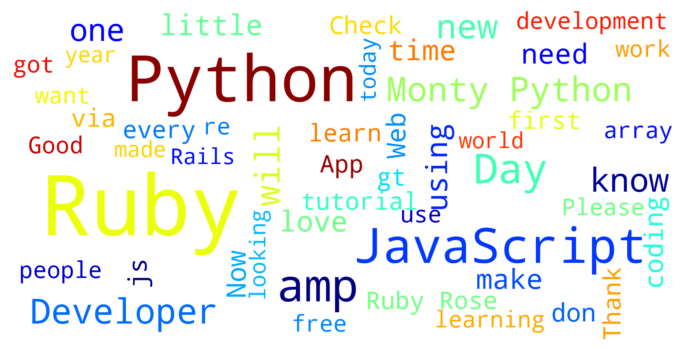

In [30]:
texts= clean_tweets(texts)
df1['text']= texts
for i in df1.index:
    j= df1['text'][i]
    if str(j)=='':
        df1.drop(i, inplace=True )

for i in range(len(texts)):
    for j in range(len(texts)):
        if texts[j]=='':
            del texts[j]
            break
texts= list(set(texts))
word_cloud(texts)

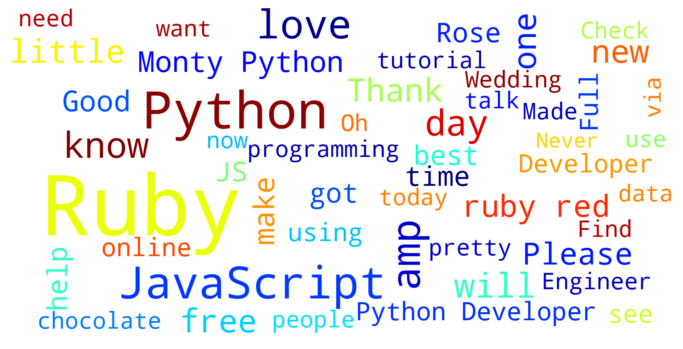

In [31]:
pos= clean_tweets(pos)
for i in range(len(pos)):
    for j in range(len(pos)):
        if pos[j]=='':
            del pos[j]
            break
pos= list(set(pos))
word_cloud(pos)

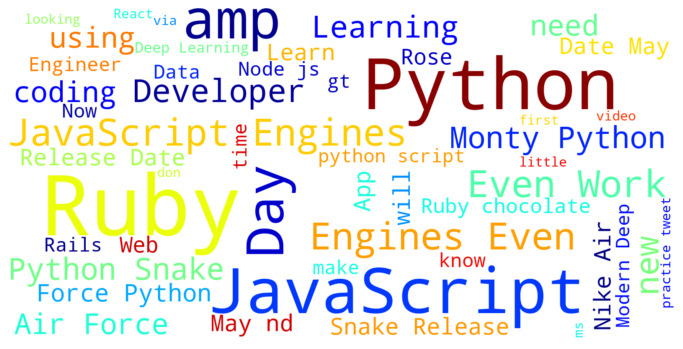

In [32]:
neut= list(set(neut))
neut= clean_tweets(neut)
for i in range(len(neut)):
    for j in range(len(neut)):
        if neut[j]=='':
            del neut[j]
            break
word_cloud(neut)

#### Python, Ruby, JavaScript, Developer are most frequently used words in all English tweets as well as in only positive and only neutral tweets (which is quite obvious considering that itself is the search query). Not k=much can be deduced from this.

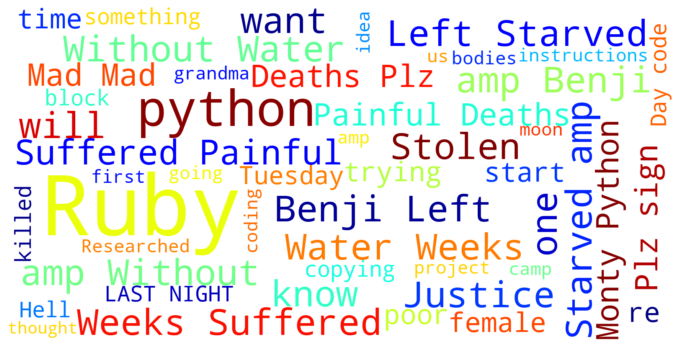

In [33]:
neg= list(set(neg))
neg= clean_tweets(neg)
for i in range(len(neg)):
    for j in range(len(neg)):
        if neg[j]=='':
            del neg[j]
            break
word_cloud(neg)

#### Ruby appears to be occurig most frequently in negative word cloud. It may be deduced that users have a more negative opinion on Ruby when compared to Python or JavaScript

### Data Frame for cleaned tweets in English (with polarity)

In [34]:
l=[]
k=[]
for i in df1.index:
    j=dict(df1['user'][i])
    if 'location' in j.keys():
        k.append(j['location'])
    else:
        k.append('')
    if 'screen_name' in j.keys(): 
        l.append(j['screen_name'])
    else:
        l.append('')
df1['User']=l
df1['User_Location']=k


In [35]:
df1=df1.rename({"created_at": "Date & Time", "text": "Tweet", "sent": "Polarity"}, axis= 'columns')
df1= df1.filter(items= ['Date & Time', 'Tweet', 'User', 'User_Location', 'Polarity'])
times=[]
for x in df1['Date & Time']:
      times.append(str(x).split("+")[0])
df1['Date & Time']= times
df1.head(10)

Date & Time                                              Tweet  \
0   Thu May 16 02:26:11                      What about the ruby playbutton   
2   Thu May 16 02:26:17   Implementing Microsoft Dynamics NAV Third Edition   
3   Thu May 16 02:26:23   This is a semicolon This is a greek question m...   
4   Thu May 16 02:26:24                       BUDDY FLEW via Jeremy Ruby FB   
5   Thu May 16 02:26:25   Your birthday month is who you re winning the ...   
6   Thu May 16 02:26:26                                       The crowd tho   
7   Thu May 16 02:26:35   My second commission of Soothing Ruby Who has ...   
8   Thu May 16 02:26:35                       BUDDY FLEW via Jeremy Ruby FB   
10  Thu May 16 02:26:39                                       Straight heat   
13  Thu May 16 02:26:49     Nike Air Force Python Snake Release Date May nd   

               User  User_Location  Polarity  
0          OriTomeX      Flamingo~         0  
2   digitalsphere33           None         1  
3       edumartinsg         Brasil         1  
4          Jon_AM94  Oklahoma, USA         0  
5       AJEdwards01           None         1  
6      asianballer1     Ballin Out        -1  
7         DarkGen95           None         1  
8   GuilhermeTanik1    Londrina PR         0  
10      TeeTeeBaby_           None         1  
13   FasionSneakers           None         0

## General sentiment trend

In [36]:
xkeys=[]
ykeys=[]
a=0
b=0
for i in texts:   
    j=dict(analyze.polarity_scores(i))
    if j['compound']>0:
        b+=1
    elif j['compound']<0:
        b-=1
    a+=1
    xkeys.append(a)
    ykeys.append(b)
trace5= go.Scatter(x=xkeys,y=ykeys,name="Realtime")

In [37]:
ykeys1=[]
b1=0
for i in texts:   
    b1+=1
    ykeys1.append(b1)
trace6 = go.Scatter( x = xkeys,y = ykeys1, name="Ideal")

In [38]:
data = [trace5, trace6]
layout={"title": "Sentiment  trend", "titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"Time", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Sentiment", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

## Sentiment by language

In [39]:
text_vals={}
for i in df.index:
    j= df['lang'][i]
    k= df['text'][i]
    if j in text_vals.keys():
        text_vals[j].append(k)
    else:
        text_vals.setdefault(j,[k])

lang_sent={}
for i in text_vals.keys():
    sentiment={'pos':0, 'neg':0, 'neutral':0}
    if len(text_vals[i])>=5:
        for j in text_vals[i]:  
            k=dict(analyze.polarity_scores(j))
            if(float(k['compound'])>0):
                sentiment['pos']+=1
            elif(float(k['compound'])==0):
                sentiment['neutral']+=1
            else :
                sentiment['neg']+=1
        lang_sent[i]= sentiment
x1= list(lang_sent.keys())
y1=[]
z1=[]
k1=[]
for i in lang_sent.values():
    j= dict(i)
    y1.append(j['pos'])
    z1.append(j['neg'])
    k1.append(j['neutral'])
    

In [40]:
trace2= go.Bar(x=x1, y=y1, name="Positive")
trace1= go.Bar(x=x1, y=z1, name="Negative")
trace0= go.Bar(x=x1, y=k1, name="Neutral")
data= [trace0, trace1, trace2]
layout={"title": "Sentiment by language", "titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"Languages", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Number", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

## Sentiment by user verification status

In [41]:
verified={'True':[], 'False':[]}
for i in df.index:
    j=dict(df['user'][i])
    if j['verified']==True:
        verified['True'].append(df['text'][i])
    else:
        verified['False'].append(df['text'][i])
        
ver_sent={}
for i in verified.keys():
    sentiment={'pos':0, 'neg':0, 'neutral':0}
    for j in verified[i]:  
        k=dict(analyze.polarity_scores(j))
        if(float(k['compound'])>0):
            sentiment['pos']+=1
        elif(float(k['compound'])==0):
            sentiment['neutral']+=1
        else :
            sentiment['neg']+=1
        ver_sent[i]= sentiment
x2= list(ver_sent.keys())
y2=[]
z2=[]
k2=[]
for i in ver_sent.values():
    j= dict(i)
    y2.append(j['pos'])
    z2.append(j['neg'])
    k2.append(j['neutral'])


In [42]:
trace2= go.Bar(x=x2, y=y2, name="Positive")
trace1= go.Bar(x=x2, y=z2, name="Negative")
trace0= go.Bar(x=x2, y=k2, name="Neutral")
data= [trace0, trace1, trace2]
layout={"title": "Sentiment by User verification status", "titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"Verified", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Number", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

#### In general, opinons of verified users tend to have more impact in public opinion formation. Hence, it is important to analyze the sentiments of verified users to understand whether they are spreading a more positive/negative opinion about said query. Here, most users are non-verified and they share a neutral opinion. Even the 0.3% of verified users share a neutral opinion on the topic.   

## Sentiment by user location

In [43]:
loc={}
for i in df.index:
    j=dict(df['user'][i])
    if j['location'] in loc.keys():
        loc[j['location']]+=1
    else:
        loc[j['location']]=1
for j in range(len(loc)):
    for i in loc.keys():
        if i=='Earth' or i=='Worldwide' or i=='codeanywhere.com' or i==None or i=='Cloud' or loc[i]<5:
            del loc[i]
            break
loc_text={}
for i in loc.keys():
    loc_text.setdefault(i,[])
for i in df.index:
    j=dict(df['user'][i])
    if j['location'] in loc_text.keys():
        loc_text[j['location']].append(df['text'][i])
        
loc_sent={}
for i in loc_text.keys():
    sentiment={'pos':0, 'neg':0, 'neutral':0}
    for j in loc_text[i]:  
        k=dict(analyze.polarity_scores(j))
        if(float(k['compound'])>0):
            sentiment['pos']+=1
        elif(float(k['compound'])==0):
            sentiment['neutral']+=1
        else :
            sentiment['neg']+=1
    loc_sent[i]= sentiment
x3= list(loc_sent.keys())
y3=[]
z3=[]
k3=[]
for i in loc_sent.values():
    j= dict(i)
    y3.append(j['pos'])
    z3.append(j['neg'])
    k3.append(j['neutral'])


In [44]:
trace2= go.Bar(x=x3, y=y3, name="Positive")
trace1= go.Bar(x=x3, y=z3, name="Negative")
trace0= go.Bar(x=x3, y=k3, name="Neutral")
data= [trace0, trace1, trace2]
layout={"title": "Sentiment by User location", "titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"Location", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Number", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

#### Users belonging to one location may share a different kind of opinion on the same query when compared to users from another location. Hence, its important to analyze the opinions of users based on loaction so that their experience may be bettered accordingly. 
#### Only users from New York and India share a negative sentiment on the given query. Maximum number of positive opinions come from India, Chicago and Sacramento. Remaining people share a neutral opinion. 

## Sentiment by user followers, friends and favorites count

In [45]:
count={'High':[],'Medium':[], 'Low':[]}
for i in df.index:
    j= dict(df['user'][i])
    if(j['followers_count']>1000 and j['friends_count']>1000 and j['favourites_count']>1000):
        count['High'].append(df['text'][i])
    elif (j['followers_count']>500 and j['friends_count']>500 and j['favourites_count']>500):
        count['Medium'].append(df['text'][i])
    else:
        count['Low'].append(df['text'][i])


foll_sent={}
for i in count.keys():
    sentiment={'pos':0, 'neg':0, 'neutral':0}
    for j in count[i]:  
        k=dict(analyze.polarity_scores(j))
        if(float(k['compound'])>0):
            sentiment['pos']+=1
        elif(float(k['compound'])==0):
            sentiment['neutral']+=1
        else :
            sentiment['neg']+=1
    foll_sent[i]= sentiment
x4= list(foll_sent.keys())
y4=[]
z4=[]
k4=[]
for i in foll_sent.values():
    j= dict(i)
    y4.append(j['pos'])
    z4.append(j['neg'])
    k4.append(j['neutral'])



In [46]:
trace2= go.Bar(x=x4, y=y4, name="Positive")
trace1= go.Bar(x=x4, y=z4, name="Negative")
trace0= go.Bar(x=x4, y=k4, name="Neutral")
data= [trace0, trace1, trace2]
layout={"title": "Sentiment by User Followers ,Friends ,Favorites count", "titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"Followers/Friends/Favorites", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Number", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

#### In general, users with highers number of followers/friends/favorites tend to have more impact in public opinion formation as this means that more people are viewing/retweeting their opinions. Hence, it is important to analyze their sentiments understand whether they are spreading a more positive/negative opinion about said query. 
#### Users with high follower/friend/favorite counts (>1000) are spreading a neutral-positive opinion on the subject. 11% of them share a negative sentiment.Similar is the case with users having medium/low counts.

## Sentiment by user geo-enabled status

In [47]:
geo={'True':[], 'False':[]}
for i in df.index:
    j=dict(df['user'][i])
    if j['geo_enabled']==True:
        geo['True'].append(df['text'][i])
    else:
        geo['False'].append(df['text'][i])        
geo_sent={}
for i in geo.keys():
    sentiment={'pos':0, 'neg':0, 'neutral':0}
    for j in geo[i]:  
        k=dict(analyze.polarity_scores(j))
        if(float(k['compound'])>0):
            sentiment['pos']+=1
        elif(float(k['compound'])==0):
            sentiment['neutral']+=1
        else :
            sentiment['neg']+=1
        geo_sent[i]= sentiment

x5= list(geo_sent.keys())
y5=[]
z5=[]
k5=[]
for i in geo_sent.values():
    j= dict(i)
    y5.append(j['pos'])
    z5.append(j['neg'])
    k5.append(j['neutral'])


In [48]:
trace2= go.Bar(x=x5, y=y5, name="Positive")
trace1= go.Bar(x=x5, y=z5, name="Negative")
trace0= go.Bar(x=x5, y=k5, name="Neutral")
data= [trace0, trace1, trace2]
layout={"title": "Sentiment by User geo-enabled status", "titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"Enabled", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Number", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

## Tag cloud
### Word cloud consiting of frequently used hashtags in all tweets

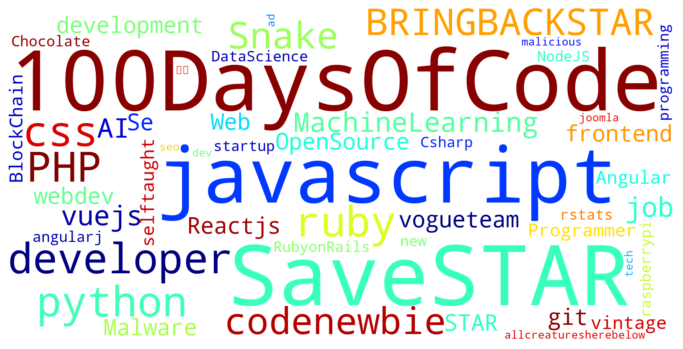

In [49]:
word=''
hashtags=[]
for i in df.index:
    if '#' in df['text'][i]:
        hashtags.append(re.findall('#\S+',df['text'][i]))

for i in range(len(hashtags)):
    for j in hashtags[i]:
        word+=j+' '
hashtags=list(set(word.split()))
word_cloud(hashtags)

#### #100DaysofCode , #SaveSTAR , #javascript , #php are the most trending hashtags for given query

## Basic Topic Modelling
### Most frequently used words, POS tags and graphs wrt time

In [50]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [51]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
texts1=[]
for i in range(0,len(texts)):
    texts[i]= texts[i].lower()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in texts]
words=[]
for i in range(0,len(doc_clean)):
    words.extend(doc_clean[i])
d = dict(nltk.FreqDist(words))
l= sorted(list(d.values()))
l.reverse()
l=l[:10]
d1={}
for i in l:
    for j in d.keys():
        if d[j]==i:
            d1[j]=i
x6= list(d1.keys())
y6= list(d1.values())
trace0= go.Bar(x=x6, y=y6,marker=dict(
        color=['rgba(50,100,200,1)', 'rgba(220,50,100,1)','rgba(200,20,200,1)','rgba(210,210,210,1)','rgba(150,20,100,1)',
               'rgba(220,300,220,1)', 'rgba(20,100,300,1)','rgba(2,230,230,1)','rgba(240,180,60,1)','rgba(190,200,250,1)']))
data= [trace0]
layout={"title": "Top ten most frequently used words", "titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"Word", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Frequency", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

#### Above graph depicts most commonly used words along with their frequency. 

In [52]:
from collections import Counter

In [53]:
tags= nltk.pos_tag(words)
counts= Counter(tag for word,tag in tags)
vals= sorted(counts.values())
vals.reverse()
vals=vals[:10]
d2={}
for i in vals:
    for j in counts.keys():
        if counts[j]==i:
            d2[j]=i


In [54]:
trans={'CC': 'coordinating conjunction', 'CD': 'cardinal digit', 
        'DT': 'determiner','EX': 'existential there','FW' : 'foreign word','IN': 'preposition/subordinating conjunction',
        'JJ': 'adjective', 'JJR': 'adjective, comparative','JJS': 'adjective, superlative',
        'LS': 'list marker', 'MD':'modal-could, will',
        'NN': 'noun, singular','NNS': 'noun, plural', 'NNP': 'proper noun, singular','NNPS': 'proper noun, plural',
        'PDT': 'predeterminer', 'POS': 'possessive ending', 'PRP': 'personal pronoun', 'PRP$': 'possessive pronoun',
        'RB': 'adverb', 'RBR': 'adverb, comparative', 'RBS': 'adverb, superlative', 'RP': 'particle',
        'TO': 'to', 'UH': 'interjection',
        'VB': 'verb, base form', 'VBD': 'verb, past tense', 'VBG': 'verb, gerund', 'VBN': 'verb, past participle', 
        'VBP': 'verb,present', 'VBZ': 'verb, 3rd person present',
        'WDT': 'wh-determiner', 'WP': 'wh-pronoun', 'WP$': 'possessive wh-pronoun', 'WRB': 'wh-abverb'}
keys=[]
vals=[]
for i in d2.keys():
    for j in trans.keys():
        if i==j:
            keys.append(trans[i])
            vals.append(d2[j])
x7= keys
y7= vals
trace0= go.Bar(x=x7, y=y7, marker=dict(
        color=['rgba(50,100,200,1)', 'rgba(220,50,100,1)','rgba(200,20,200,1)','rgba(210,210,210,1)','rgba(150,300,100,1)',
               'rgba(220,220,220,1)', 'rgba(20,100,300,1)','rgba(2,230,230,1)','rgba(240,180,60,1)','rgba(190,200,250,1)']))
data= [trace0]
layout={"title": "Top ten most frequently used POS tags", "titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"POS", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Frequency", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig) 

#### Above graph depicts most commonly used to part of speech tags in tweets along with their frequency. 

In [55]:
sentences=[]
for i in texts:
    for j in x6:
        if j in i:
            sentences.append(i)
            break  
sentiment={'pos':0, 'neg':0, 'neutral':0}
for i in sentences:
    j=dict(analyze.polarity_scores(i))
    if(float(j['compound'])>0):
        sentiment['pos']+=1
    elif(float(j['compound'])==0):
        sentiment['neutral']+=1
    else :
        sentiment['neg']+=1

trace0= go.Bar(x=list(sentiment.keys()), y=list(sentiment.values()), marker=dict(color=['rgba(100,270,100,1)', 'rgba(255,0,50,1)', 'rgba(150,200,250,1)']))
data= [trace0]
layout={"title": "Polarity of tweets having atleast one of top ten most frequently used words", "titlefont":dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ), "xaxis":{"title":"Sentiment", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}, "yaxis":{"title":"Number of tweets", "titlefont":dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )}}
fig= go.Figure(data= data, layout= layout)
iplot(fig)

#### Majority of tweets that contain atleast one of the ten most ferquently used words convey a positive opinion on the given query. Only 14.5% of these tweets convey a negative opinion. It can be deduced that the top ten frequently used words are used in a positive context.

In [56]:
time=[]
for i in df1['Date & Time']:
    time.append(i.split()[3].split(':'))
p=0
domain={'a':[], 'b':[], 'c':[]}
for i,j,k in time:
    if p in df1.index:
        if int(i)==2 and 20<int(j)<40:
            domain['a'].append(df1['Tweet'][p])
        elif int(i)==2 and 40<int(j)<60:
            domain['b'].append(df1['Tweet'][p])
        else:
            domain['c'].append(df1['Tweet'][p])
    p+=1

In [57]:
cltxt = [clean(doc).split() for doc in domain['a']]
words=[]
for i in range(0,len(cltxt)):
    words.extend(cltxt[i])
d = dict(nltk.FreqDist(words))
l= sorted(list(d.values()))
l.reverse()
l=l[:10]
d3={}
for i in l:
    for j in d.keys():
        if d[j]==i:
            d3[j]=i
x14= list(d3.keys())
y14= list(d3.values())
tracea= go.Bar(x=x14, y=y14, name="2:20-2:40")

In [58]:
cltxt = [clean(doc).split() for doc in domain['b']]
words=[]
for i in range(0,len(cltxt)):
    words.extend(cltxt[i])
d = dict(nltk.FreqDist(words))
l= sorted(list(d.values()))
l.reverse()
l=l[:10]
d4={}
for i in l:
    for j in d.keys():
        if d[j]==i:
            d4[j]=i
x15= list(d4.keys())
y15= list(d4.values())
traceb= go.Bar(x=x15, y=y15, name="2:40-3:00")

In [59]:
cltxt = [clean(doc).split() for doc in domain['c']]
words=[]
for i in range(0,len(cltxt)):
    words.extend(cltxt[i])
d = dict(nltk.FreqDist(words))
l= sorted(list(d.values()))
l.reverse()
l=l[:10]
d5={}
for i in l:
    for j in d.keys():
        if d[j]==i:
            d5[j]=i
x16= list(d5.keys())
y16= list(d5.values())
tracec= go.Bar(x=x16, y=y16, name="3:00-3:20")

In [60]:

fig=tools.make_subplots(rows=1, cols=3,subplot_titles=("2:20-2:40", "2:40-3:00", "3:00-3:20"), shared_yaxes=True)
fig.append_trace(tracea,1,1)
fig.append_trace(traceb,1,2)
fig.append_trace(tracec,1,3)
fig.layout.update(title="Most frequently used words wrt time",titlefont=dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ),xaxis=dict(
        title='Words',
        titlefont=dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )), yaxis=dict(
        title='Frequency',
        titlefont=dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )),showlegend= False)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]  [ (1,3) x3,y1 ]



#### Live tweets were gathered from time slot 2:26-3:45 and these tweets are dividing into three time intervals fo 20mins each. Above graphs depict the top ten most frequently used words at each time slot. 

In [61]:
sentences=[]
for i in texts:
    for j in x14:
        if j in i:
            sentences.append(i)
            break  
sentiment={'pos':0, 'neg':0, 'neutral':0}
for i in sentences:
    j=dict(analyze.polarity_scores(i))
    if(float(j['compound'])>0):
        sentiment['pos']+=1
    elif(float(j['compound'])==0):
        sentiment['neutral']+=1
    else :
        sentiment['neg']+=1
trace11= go.Bar(x=list(sentiment.keys()), y=list(sentiment.values()), marker=dict(color=['rgba(100,270,100,1)', 'rgba(255,0,50,1)', 'rgba(150,200,250,1)']), name="2:20-2:40")

In [62]:
sentences=[]
for i in texts:
    for j in x15:
        if j in i:
            sentences.append(i)
            break  
sentiment={'pos':0, 'neg':0, 'neutral':0}
for i in sentences:
    j=dict(analyze.polarity_scores(i))
    if(float(j['compound'])>0):
        sentiment['pos']+=1
    elif(float(j['compound'])==0):
        sentiment['neutral']+=1
    else :
        sentiment['neg']+=1
trace12= go.Bar(x=list(sentiment.keys()), y=list(sentiment.values()), marker=dict(color=['rgba(100,270,100,1)', 'rgba(255,0,50,1)', 'rgba(150,200,250,1)']), name="2:40-3:00")

In [63]:
sentences=[]
for i in texts:
    for j in x16:
        if j in i:
            sentences.append(i)
            break  
sentiment={'pos':0, 'neg':0, 'neutral':0}
for i in sentences:
    j=dict(analyze.polarity_scores(i))
    if(float(j['compound'])>0):
        sentiment['pos']+=1
    elif(float(j['compound'])==0):
        sentiment['neutral']+=1
    else :
        sentiment['neg']+=1
trace13= go.Bar(x=list(sentiment.keys()), y=list(sentiment.values()), marker=dict(color=['rgba(100,270,100,1)', 'rgba(255,0,50,1)', 'rgba(150,200,250,1)']), name="3:00-3:20")

In [64]:
figa=tools.make_subplots(rows=1, cols=3,subplot_titles=("2:20-2:40", "2:40-3:00", "3:00-3:20"), shared_yaxes=True)
figa.append_trace(trace11,1,1)
figa.append_trace(trace12,1,2)
figa.append_trace(trace13,1,3)
figa.layout.update(title="Polarity of tweets having atleast one of most frequently used words wrt time",titlefont=dict(
            family='Arial, sans-serif',
            size=24,
            color='black'
        ),xaxis=dict(
        title='Words',
        titlefont=dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )), yaxis=dict(
        title='Frequency',
        titlefont=dict(
            family='Arial, sans-serif',
            size=20,
            color='black'
        )), showlegend= False)
iplot(figa)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]  [ (1,3) x3,y1 ]



#### Some words maybe used more frequently at a specific time of the day to convey a certain sentiement due to some triggers. Above graph depicts the same, using tweets that contain atleast one of the top ten most frequently used words in that time slot. 
#### As is evident, maximum number of tweets are released in the third slot suggesting users are more active around this time of the day and majority of these tweets convey a positive sentiment. About 15% of the tweets in all hree time slots convey a negative sentiment. Majority of tweets in the first time slot are positive and in the second slot are neutral. 